In [1]:
import numpy as np
import pandas as pd

#for charts
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud    

In [2]:
#for text processing
import string
import re
import nltk
from textblob import TextBlob

In [3]:
#for tokenization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#for feature selection
from sklearn import decomposition

#for model building
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [4]:
#dataframe job postings
jobs=pd.read_csv('C:/Users/Jitesh Chandani/Desktop/data job posts.csv')

In [5]:
jobs.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [6]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [7]:
#lowercase the column names
jobs.columns = jobs.columns.str.lower()

In [8]:
jobs.columns

Index(['jobpost', 'date', 'title', 'company', 'announcementcode', 'term',
       'eligibility', 'audience', 'startdate', 'duration', 'location',
       'jobdescription', 'jobrequirment', 'requiredqual', 'salary',
       'applicationp', 'openingdate', 'deadline', 'notes', 'aboutc', 'attach',
       'year', 'month', 'it'],
      dtype='object')

# Data Cleaning

In [9]:
#removing duplicate jobposts based on title and post
jobs = jobs.drop_duplicates(['jobpost', 'title'])

In [10]:
jobs.shape

(18892, 24)

# Type of demanding jobs in Armenia

In [11]:
jobs['title'] = jobs['title'].astype('str')


In [12]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
#UDF to do basic cleaning of title column to understand type of jobs
def clean_data(text):
    text = text.lower()  # convert all the text into lowercase
    text = text.strip()  #remove starting and trailing whitespaces
    #special_chars = re.compile('[@!#$%^&*()<>?/\|}{~:;]')
    #text = re.sub(special_chars,'', text)
    special_char_reg = '([a-zA-Z0-9]+)' + '[!"#$%&\'()*+,-./:;<=>?@\\^_`{|}~]' + '([a-zA-Z0-9]+)'
    text = re.sub(special_char_reg, ' ', text)
    text = re.sub(r'\s+', ' ', text) #remove all line formattings
    text = re.sub(r'\d+', '', text) #remove digits
    text = ''.join(c for c in text if c not in string.punctuation)   #remove pecial symbols from job titles
    return text

In [14]:
jobs.title.head(6)

0                              Chief Financial Officer
1    Full-time Community Connections Intern (paid i...
2                                  Country Coordinator
3                                       BCC Specialist
4                                   Software Developer
5                                           Saleswoman
Name: title, dtype: object

In [15]:
title_df = jobs.title.apply(lambda x : clean_data(x))
title_df.head()

0                          chief financial officer
1     community connections intern paid internship
2                              country coordinator
3                                   bcc specialist
4                               software developer
Name: title, dtype: object

In [16]:
from nltk import WordNetLemmatizer

In [17]:
def lemma(text):
    word_list = nltk.word_tokenize(text) #tokenize beofre lemmatization
    lemma_output = ' '.join(WordNetLemmatizer().lemmatize(word) for word in word_list)
    return lemma_output

In [18]:
title_df_1 = title_df.apply(lambda x : lemma(x))

In [19]:
title_df_1.head()

0                        chief financial officer
1    community connection intern paid internship
2                            country coordinator
3                                 bcc specialist
4                             software developer
Name: title, dtype: object

In [20]:
#Stop words removal
stop = nltk.corpus.stopwords.words('english')

In [21]:
title_df_1 = title_df_1.apply(lambda x : ' '.join(x for x in x.split() if x not in stop))

In [22]:
title_df_1.head()

0                        chief financial officer
1    community connection intern paid internship
2                            country coordinator
3                                 bcc specialist
4                             software developer
Name: title, dtype: object

Now to undertand the most demanding jobs in armenia we can create a bi/tri gram DTM on the job titles and find the most occuring token to be the most demanding job

In [23]:
#Tokenization using count vectorizer
count_vect = CountVectorizer(ngram_range=(1,1))
token = count_vect.fit_transform(title_df_1)

In [24]:
token

<18892x2542 sparse matrix of type '<class 'numpy.int64'>'
	with 53675 stored elements in Compressed Sparse Row format>

In [25]:
print(count_vect.get_feature_names())

['aacas', 'abap', 'abatement', 'abattoir', 'abkhazia', 'abovyan', 'abuse', 'academy', 'acca', 'access', 'accident', 'account', 'accountability', 'accountancy', 'accountant', 'accounting', 'achajour', 'acquiring', 'acquisition', 'act', 'action', 'actionscript', 'activation', 'active', 'activity', 'actuarial', 'actuary', 'ad', 'adaptation', 'adb', 'added', 'addition', 'address', 'adherence', 'adjuster', 'adjustor', 'admin', 'administration', 'administrative', 'administrator', 'adminsitrative', 'adminstration', 'adminstrative', 'adminstrator', 'admission', 'adobe', 'adolescent', 'adp', 'advanced', 'adventure', 'advertisement', 'advertising', 'advertizing', 'adviser', 'advising', 'advisor', 'advisory', 'advocacy', 'advocate', 'aerobics', 'affair', 'affiliate', 'affluent', 'agency', 'agent', 'agile', 'agreement', 'agribusiness', 'agricultural', 'agriculture', 'agriculturist', 'agro', 'agronomist', 'agroprocessing', 'aid', 'aide', 'aided', 'aiming', 'air', 'aircraft', 'airline', 'airport', '

In [26]:
print('Total number of tokens/words in all the job titles - ', len(count_vect.get_feature_names()))

Total number of tokens/words in all the job titles -  2542


In [27]:
temp_df =  pd.DataFrame(token.toarray(), columns=count_vect.get_feature_names())
temp_df.tail()

,aacas,abap,abatement,abattoir,abkhazia,abovyan,abuse,academy,acca,access,...,yield,yoga,young,youth,zang,zend,zonal,zone,zooplankton,zvartnots
18887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#count the accurence of each token in entire corpus
count_df = temp_df.apply(lambda x : x.sum())

In [29]:
count_df = pd.DataFrame(count_df).reset_index()

In [30]:
count_df.columns = ['Word', 'Count']

In [31]:
top_jobs = count_df.sort_values(by = 'Count', ascending=False)

In [32]:
top_jobs[:10]

,Word,Count
1382,manager,2587
2134,specialist,2067
661,developer,1942
797,engineer,1601
2053,senior,1490
179,assistant,1234
2115,software,1099
2003,sale,855
14,accountant,779
649,department,742


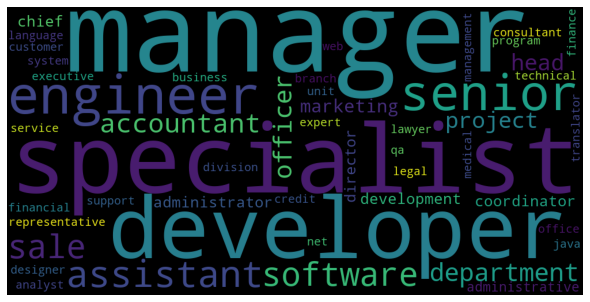

In [33]:
# plot the WordCloud image to show top 50 type of demanding jobs in armenia     
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(top_jobs[:50].Word))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Job Nature changing over time

In [34]:
date_field=jobs['year'].tolist()

In [35]:
Job_year = pd.DataFrame(np.column_stack([title_df_1,date_field]), 
                               columns=['Job_title','Year'])
Job_year.tail(5)

,Job_title,Year
18887,senior creative ux ui designer,2015
18888,category development manager,2015
18889,operational marketing manager,2015
18890,head online sale department,2015
18891,lawyer legal department,2015


In [36]:
Job_year.dtypes

Job_title    object
Year         object
dtype: object

In [37]:
#Converting year to numeric value 

Job_year['Year']=Job_year['Year'].astype('int')

In [38]:
#We will devide year into 3 equidistant bins to find the job nature over the period

Job_year['Year_bins']=pd.cut(Job_year['Year'],3,labels=['Period1','Period2','Period3'])

In [39]:
Job_year.pivot_table(values='Year',index='Year_bins',aggfunc=['min','max','count'])

,min,max,count
,Year,Year,Year
Year_bins,,,
Period1,2004,2007,4658
Period2,2008,2011,6123
Period3,2012,2015,8111


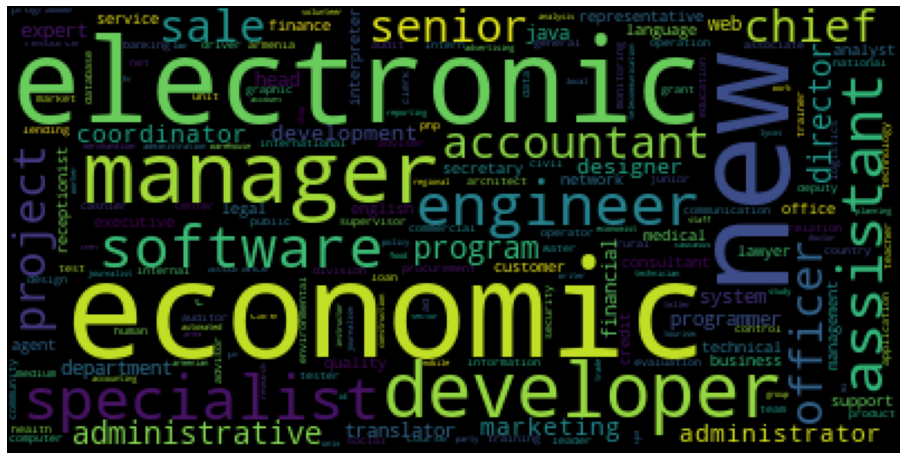

In [41]:
# for 2004-2007

X1=Job_year[Job_year['Year_bins']=='Period1'].iloc[:,0]

# Selecting top 500 jobs for the wordcloud
titlecount = {}
for data in X1:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in titlecount.keys():
            titlecount[word] = 1
        else:
            titlecount[word] += 1

import heapq
freq_words = heapq.nlargest(500,titlecount,key=titlecount.get)

#gather features
text = " ".join(freq_words)

# Wordcloud need to draw for nature of job
wordcloud = WordCloud(stopwords=[],max_font_size=60).generate(text)
plt.figure(figsize=(16,12))

# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

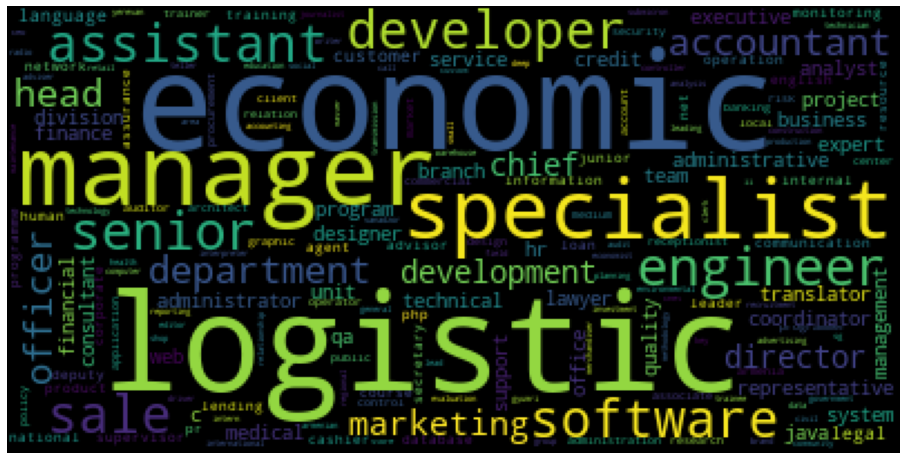

In [42]:
# for 2008-2011

X2=Job_year[Job_year['Year_bins']=='Period2'].iloc[:,0]
# Selecting top 500 jobs for the wordcloud

titlecount = {}
for data in X2:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in titlecount.keys():
            titlecount[word] = 1
        else:
            titlecount[word] += 1
            
# import heapq
freq_words = heapq.nlargest(500,titlecount,key=titlecount.get)

#gather features
text = " ".join(freq_words)
wordcloud = WordCloud(stopwords=[],max_font_size=60).generate(text)
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

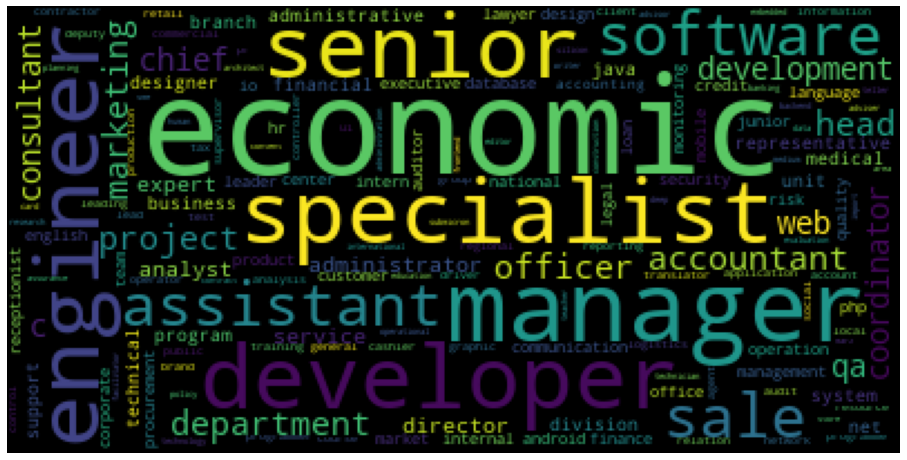

In [43]:
#for 20012-2015

X3=Job_year[Job_year['Year_bins']=='Period3'].iloc[:,0]
# Selecting top 500 jobs for the wordcloud

titlecount = {}
for data in X3:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in titlecount.keys():
            titlecount[word] = 1
        else:
            titlecount[word] += 1
            
# import heapq
freq_words = heapq.nlargest(500,titlecount,key=titlecount.get)

#gather features
text = " ".join(freq_words)
wordcloud = WordCloud(stopwords=[],max_font_size=60).generate(text)
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Desired characteristics and Skill-sets

To understand this we can make clusters using job description column of the data

In [44]:
x = jobs[jobs.jobdescription.isna() == False]

In [45]:
jobs.shape

(18892, 24)

In [46]:
x.shape

(15059, 24)

In [47]:
x.head()

,jobpost,date,title,company,announcementcode,term,eligibility,audience,startdate,duration,...,salary,applicationp,openingdate,deadline,notes,aboutc,attach,year,month,it
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
5,"Boutique ""Appollo""\nJOB TITLE: Saleswoman\nPO...","Jan 10, 2004",Saleswoman,"Boutique ""Appollo""",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"For further information, please contact Irina\...",NaN,01 February 2004,NaN,NaN,NaN,2004,1,False
6,OSI Assistance Foundation - Armenian Branch Of...,"Jan 11, 2004",Chief Accountant/ Finance Assistant,OSI Assistance Foundation - Armenian Branch Of...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"For submission of applications/ CVs, please\nc...",NaN,"16 January 2004, 6:00 pm.",NaN,NaN,NaN,2004,1,False


# Text pre-processing

In [48]:
x['jobdescription'] = x['jobdescription'].astype('str')

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
desc_df = x.jobdescription.apply(lambda x : clean_data(x))
desc_df.head()

0    ameria investment consulting company is seekin...
2    public outreach and strengthening of a growing...
3    the lead local enhancement and development for...
5        saleswoman will sell menswear and accessories
6    the armenian branch office of the open society...
Name: jobdescription, dtype: object

In [50]:
#LEmmatization
desc_df_1 = desc_df.apply(lambda x : lemma(x))

In [51]:
desc_df_1.head()

0    ameria investment consulting company is seekin...
2    public outreach and strengthening of a growing...
3    the lead local enhancement and development for...
5          saleswoman will sell menswear and accessory
6    the armenian branch office of the open society...
Name: jobdescription, dtype: object

In [52]:
#stop word removal
desc_df_1 = desc_df_1.apply(lambda x : ' '.join(x for x in x.split() if x not in stop))

In [53]:
desc_df_1.head()

0    ameria investment consulting company seeking c...
2    public outreach strengthening growing network ...
3    lead local enhancement development health bcc ...
5                   saleswoman sell menswear accessory
6    armenian branch office open society institute ...
Name: jobdescription, dtype: object

In [54]:
#Tokenization
tfidf_vect = TfidfVectorizer(ngram_range=(1,1), min_df = 0.05, max_df=0.95, stop_words='english')
x_tdm = tfidf_vect.fit_transform(desc_df_1)
#print(x_tdm)

In [55]:
df_clust = pd.DataFrame(x_tdm.toarray(), columns=tfidf_vect.get_feature_names())

In [56]:
df_clust.head()

,activity,application,armenia,armenian,business,candidate,cjsc,company,customer,department,...,specialist,staff,supervision,support,team,technical,web,work,working,yerevan
0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.194334,0.0,0.0,...,0.000000,0.249222,0.0,0.000000,0.0,0.238657,0.0,0.172784,0.000000,0.0
1,0.0,0.000000,0.0,0.000000,0.636526,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.152405,0.352672,0.0,0.283144,0.0,0.000000,0.0,0.244504,0.343333,0.0
3,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
4,0.0,0.455289,0.0,0.520589,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0


# Clustering

In [57]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [58]:
model = KMeans(n_clusters=5, 
               init='k-means++', 
               max_iter=100, n_init=1,random_state=5)
kmeans = model.fit(x_tdm)

In [59]:
# we create a kmeans model
km_3 = KMeans(n_clusters=3,init='k-means++', max_iter=100, n_init=1, random_state=5).fit(x_tdm)
km_4 = KMeans(n_clusters=4,init='k-means++', max_iter=100, n_init=1, random_state=5).fit(x_tdm)
km_5 = KMeans(n_clusters=5,init='k-means++', max_iter=100, n_init=1, random_state=5).fit(x_tdm)
km_6 = KMeans(n_clusters=6,init='k-means++', max_iter=100, n_init=1, random_state=5).fit(x_tdm)
km_7 = KMeans(n_clusters=7,init='k-means++', max_iter=100, n_init=1, random_state=5).fit(x_tdm)
km_8 = KMeans(n_clusters=8,init='k-means++', max_iter=100, n_init=1, random_state=5).fit(x_tdm)
km_9 = KMeans(n_clusters=9,init='k-means++', max_iter=100, n_init=1, random_state=5).fit(x_tdm)

In [60]:
# save the cluster labels and sort by cluster
x['cluster_3'] = km_3.labels_
x['cluster_4'] = km_4.labels_
x['cluster_5'] = km_5.labels_
x['cluster_6'] = km_6.labels_
x['cluster_7'] = km_7.labels_
x['cluster_8'] = km_8.labels_
x['cluster_9'] = km_9.labels_

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [61]:
len(tfidf_vect.get_feature_names())

59

In [62]:
vocab = np.array(tfidf_vect.get_feature_names())
vocab

array(['activity', 'application', 'armenia', 'armenian', 'business',
       'candidate', 'cjsc', 'company', 'customer', 'department', 'design',
       'develop', 'developer', 'development', 'direct', 'director',
       'engineer', 'ensure', 'experienced', 'financial', 'highly',
       'implementation', 'incumbent', 'international', 'llc', 'looking',
       'management', 'manager', 'motivated', 'office', 'operation',
       'person', 'position', 'process', 'product', 'professional',
       'program', 'project', 'provide', 'qualified', 'quality', 'report',
       'responsibility', 'responsible', 'sale', 'seeking', 'senior',
       'service', 'software', 'specialist', 'staff', 'supervision',
       'support', 'team', 'technical', 'web', 'work', 'working',
       'yerevan'], dtype='<U14')

In [63]:
cluster_centers = np.array(km_5.cluster_centers_)
cluster_centers[0].argsort()

array([45, 48, 21, 36, 50, 17,  1, 38, 40, 52, 54, 55, 33, 11, 41, 14, 46,
       30, 10, 42,  3, 12, 16, 26, 51, 34, 22, 58,  8,  0, 13, 57,  4, 37,
       15, 53, 19, 47, 29,  9, 43, 23, 44, 20, 18, 56, 49,  2, 35, 27, 31,
       39,  6, 28,  7, 24,  5, 32, 25], dtype=int64)

In [64]:
km_3.labels_

array([2, 0, 2, ..., 1, 0, 2])

In [65]:
x['cluster_3'].value_counts()/sum(x['cluster_3'].value_counts())

2    0.507471
0    0.304137
1    0.188392
Name: cluster_3, dtype: float64

In [66]:
x['cluster_4'].value_counts()/sum(x['cluster_4'].value_counts())

2    0.357793
0    0.252872
3    0.203466
1    0.185869
Name: cluster_4, dtype: float64

In [67]:
x['cluster_5'].value_counts()/sum(x['cluster_5'].value_counts())

2    0.307457
0    0.200545
3    0.184674
1    0.170529
4    0.136795
Name: cluster_5, dtype: float64

In [68]:
x['cluster_6'].value_counts()/sum(x['cluster_6'].value_counts())

2    0.299821
0    0.178166
1    0.176705
3    0.132346
5    0.130752
4    0.082210
Name: cluster_6, dtype: float64

In [69]:
x['cluster_7'].value_counts()/sum(x['cluster_7'].value_counts())

2    0.279169
0    0.179959
1    0.169467
5    0.133077
4    0.116342
3    0.071519
6    0.050468
Name: cluster_7, dtype: float64

In [70]:
x['cluster_8'].value_counts()/sum(x['cluster_8'].value_counts())

4    0.249286
5    0.171857
1    0.109237
6    0.107444
2    0.104987
7    0.101999
0    0.097218
3    0.057972
Name: cluster_8, dtype: float64

# Evaluation clusters

In [71]:
from sklearn import  metrics
metrics.silhouette_score(x_tdm, labels=km_3.labels_)

0.04473475224823506

In [72]:
scores = []
scores.append(metrics.silhouette_score(x_tdm, labels=km_3.labels_))
scores.append(metrics.silhouette_score(x_tdm, labels=km_4.labels_))
scores.append(metrics.silhouette_score(x_tdm, labels=km_5.labels_))
scores.append(metrics.silhouette_score(x_tdm, labels=km_6.labels_))
scores.append(metrics.silhouette_score(x_tdm, labels=km_7.labels_))
scores.append(metrics.silhouette_score(x_tdm, labels=km_8.labels_))
scores.append(metrics.silhouette_score(x_tdm, labels=km_9.labels_))
scores

[0.04473475224823506,
 0.049466365994301056,
 0.05336140738603864,
 0.0546016389851462,
 0.06324956661406249,
 0.060378588957259754,
 0.06054596862120471]

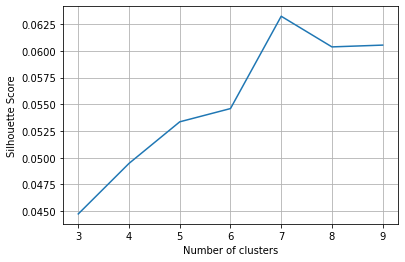

In [73]:
plt.plot(range(3,10), scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid('True')

In [74]:
# sorting the cluster centers for 7 clusters
sorted_vals = [km_7.cluster_centers_[i].argsort() for i in range(0,np.shape(km_7.cluster_centers_)[0])]

In [75]:
# get top 10 words from that cluster
words=set()
for i in range(len(km_7.cluster_centers_)):
    words = set(vocab[sorted_vals[i][-10:]])
    print(words)

{'professional', 'company', 'position', 'person', 'motivated', 'looking', 'llc', 'qualified', 'candidate', 'cjsc'}
{'developer', 'product', 'senior', 'application', 'looking', 'team', 'engineer', 'web', 'development', 'software'}
{'project', 'implementation', 'office', 'armenia', 'management', 'program', 'support', 'work', 'development', 'activity'}
{'product', 'seeking', 'company', 'manager', 'customer', 'sale', 'looking', 'incumbent', 'responsible', 'service'}
{'company', 'seeking', 'manager', 'llc', 'motivated', 'specialist', 'position', 'qualified', 'candidate', 'cjsc'}
{'operation', 'company', 'management', 'supervision', 'service', 'incumbent', 'work', 'responsible', 'development', 'activity'}
{'financial', 'company', 'management', 'report', 'looking', 'incumbent', 'responsible', 'position', 'operation', 'activity'}


# IT Job Classification

In [109]:
class_data = jobs[(jobs.title.isna() == False) & (jobs.jobrequirment.isna() == False) & (jobs.requiredqual.isna() == False) &
                 (jobs.jobdescription.isna() == False) & (jobs.aboutc.isna() == False) & (jobs.company.isna() == False)]

In [110]:
class_data.shape

(8993, 24)

In [111]:
class_data.isna().sum()

jobpost                0
date                   0
title                  0
company                0
announcementcode    8379
term                4359
eligibility         6619
audience            8648
startdate           3830
duration            2860
location               1
jobdescription         0
jobrequirment          0
requiredqual           0
salary              3549
applicationp           0
openingdate          125
deadline               4
notes               8036
aboutc                 0
attach              8528
year                   0
month                  0
it                     0
dtype: int64

In [112]:
#identify Y variable
class_data['it'] = class_data.it.apply(lambda x : 0 if (x is False) else 1)
y=class_data['it']

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [113]:
y.value_counts()

0    6780
1    2213
Name: it, dtype: int64

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='it', ylabel='count'>

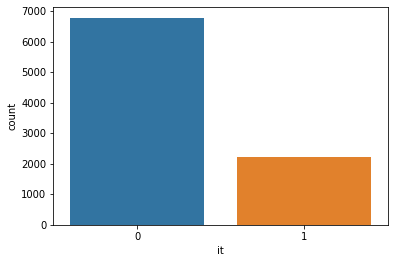

In [114]:
sns.countplot(y)

In [115]:
class_data = class_data['title'].str.cat(class_data['jobrequirment'], sep =" ").str.cat(class_data['requiredqual'], sep =" ").str.cat(
    class_data['jobdescription'], sep =" ").str.cat(class_data['aboutc'], sep =" ").str.cat(class_data['company'], sep =" ")
class_df = class_data

In [116]:
class_df.head()

2     Country Coordinator - Working with the Country...
22    Marketing Advisor - Lead the effort to identif...
56    Manufacturing Chief - To manage all manufactur...
64    Administrative Assistant/ Secretary - To welco...
67    Salesman / Trade agent - To distribute and dis...
Name: title, dtype: object

# Text pre-processing

In [117]:
class_df = class_df.apply(lambda x : clean_data(str(x)))
class_df.head()

2     country coordinator  working with the country ...
22    marketing advisor  lead the effort to identify...
56    manufacturing chief  to manage all manufacturi...
64    administrative assistant secretary  to welcome...
67    salesman  trade agent  to distribute and displ...
Name: title, dtype: object

In [118]:
#Lemmatization
class_df_1 = class_df.apply(lambda x : lemma(x))

In [119]:
class_df_1.head()

2     country coordinator working with the country d...
22    marketing advisor lead the effort to identify ...
56    manufacturing chief to manage all manufacturin...
64    administrative assistant secretary to welcome ...
67    salesman trade agent to distribute and display...
Name: title, dtype: object

In [120]:
#stop word removal
class_df_1 = class_df_1.apply(lambda x : ' '.join(x for x in x.split() if x not in stop))

In [121]:
class_df_1.head()

2     country coordinator working country director p...
22    marketing advisor lead effort identify target ...
56    manufacturing chief manage manufacturing funct...
64    administrative assistant secretary welcome vis...
67    salesman trade agent distribute display import...
Name: title, dtype: object

In [122]:
#Tokenization
tfidf_vect = TfidfVectorizer(ngram_range=(1,1), min_df = 0.05, max_df=0.95, stop_words='english')
x_tdm = tfidf_vect.fit_transform(class_df_1)
#print(x_tdm)

In [123]:
df_clust = pd.DataFrame(x_tdm.toarray(), columns=tfidf_vect.get_feature_names())

In [124]:
df_clust.head()

,ability,access,accordance,according,account,accountant,accounting,accuracy,accurate,achieve,...,window,word,work,working,world,write,writing,written,year,yerevan
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.000000,0.000000,0.124273,0.0,0.0,0.0,0.063437,0.040290,0.000000
1,0.014898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.038868,0.031142,0.012675,0.000000,0.0,0.0,0.0,0.000000,0.043389,0.000000
2,0.032916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.000000,0.112018,0.000000,0.0,0.0,0.0,0.050313,0.031954,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.129004,0.000000,0.000000,0.0,0.0,0.0,0.094335,0.059912,0.122743
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32856,...,0.000000,0.000000,0.000000,0.177316,0.0,0.0,0.0,0.000000,0.229945,0.000000


# Building a Random Forest Model

In [125]:
# Divide the data into train and test
from sklearn.model_selection import train_test_split

train_x, test_x,train_y, test_y = train_test_split(df_clust,y, test_size = 0.2, random_state = 5)
print(train_x.shape, test_x.shape)

(7194, 489) (1799, 489)


In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [128]:
#param_grid = {'n_estimators':[120,130,150,160,180,200],
              #'max_features':[9,10,13,15,17,19]}

#grid_rf = GridSearchCV(estimator= RandomForestClassifier(),
                      #param_grid=param_grid,
                      #cv = 10,
                      #n_jobs=-1)

#grid_rf.fit(train_x,train_y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [129]:
#grid_rf.best_score_

0.9489829624478443

In [130]:
#grid_rf.best_params_

{'max_features': 17, 'n_estimators': 180}

In [131]:
grid_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=17,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=180,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [132]:
#Fit the model
rf_model = grid_rf.best_estimator_
rf_model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=17,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=180,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Predict the output for train and validation set

In [133]:
rf_train_predict = pd.DataFrame({'actual' : train_y,
                                 'predicted' : rf_model.predict(train_x)})
rf_train_predict.head()

,actual,predicted
18595,1,1
14290,1,1
12772,1,1
13946,0,0
9745,0,0


In [134]:
rf_test_predict = pd.DataFrame({'actual' : test_y,
                                 'predicted' : rf_model.predict(test_x)})
rf_test_predict.head()

,actual,predicted
8007,0,0
6159,0,0
9782,0,0
6132,0,0
6649,0,0


# Model Evaluation

In [135]:
#1. Check accuracy score on train and test

print('Accuracy Score for train dataset : ' , metrics.accuracy_score(rf_train_predict.actual, rf_train_predict.predicted))
print('Accuracy Score for test dataset : ' , metrics.accuracy_score(rf_test_predict.actual, rf_test_predict.predicted))

Accuracy Score for train dataset :  0.9998609952738393
Accuracy Score for test dataset :  0.9438576987215119


In [136]:
#2. Check roc_auc score on train and test

print('ROC-AUC Score for train dataset : ' , metrics.roc_auc_score(rf_train_predict.actual, rf_train_predict.predicted))
print('ROC-AUC Score for validation dataset : ' , metrics.roc_auc_score(rf_test_predict.actual, rf_test_predict.predicted))

ROC-AUC Score for train dataset :  0.9997209821428572
ROC-AUC Score for validation dataset :  0.903142011038753


<AxesSubplot:>

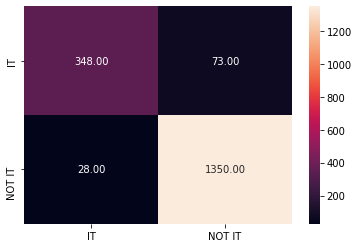

In [137]:
#3. Create confusion matrix
#for test

conn_cm_test = metrics.confusion_matrix(rf_test_predict.actual, rf_test_predict.predicted, [1,0])
sns.heatmap(conn_cm_test, fmt= '.2f', annot=True,  xticklabels=['IT', 'NOT IT'], yticklabels=['IT', 'NOT IT'])

In [138]:
#4. Create classification report
print(metrics.classification_report(rf_test_predict.actual, rf_test_predict.predicted))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1378
           1       0.93      0.83      0.87       421

    accuracy                           0.94      1799
   macro avg       0.94      0.90      0.92      1799
weighted avg       0.94      0.94      0.94      1799



In [139]:
indices = np.argsort(rf_model.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])
for f in range(train_x.shape[1]):
    feature_rank.loc[f] = [f+1,
                          train_x.columns[indices[f]],
                          rf_model.feature_importances_[indices[f]]]
feature_rank.round(3)

,rank,feature,importance
0,1,developer,0.076
1,2,software,0.045
2,3,design,0.035
3,4,programming,0.027
4,5,sql,0.025
...,...,...,...
484,485,value,0.000
485,486,oversee,0.000
486,487,correspondence,0.000
487,488,accountant,0.000


In [140]:
feature_rank[:15]

,rank,feature,importance
0,1,developer,0.075758
1,2,software,0.044699
2,3,design,0.034594
3,4,programming,0.027490
4,5,sql,0.025409
5,6,web,0.025017
6,7,html,0.023034
7,8,oop,0.021617
8,9,development,0.020968
9,10,java,0.020304


Presence of keywords like software, developer, web, design, cs are the important feautures while clasifying any job as IT or NON-IT

# Similarity of Jobs

In [49]:
# Using TF-IDF as cosine similarity

from sklearn.metrics.pairwise import cosine_similarity


In [50]:
def get_cosine_sim(doc): 
    vectors = [t for t in get_vectors(doc)]
    return cosine_similarity(vectors)
    
def get_vectors(doc):
    text = [t for t in doc]
    vectorizer = CountVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

# Using word embeddings Doc2Vec

In [64]:
from gensim import utils
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec

In [51]:
jobs['jobpost'] = jobs['jobpost'].astype('str')

In [52]:
#UDF to do basic cleaning of title column to understand type of jobs
def clean_data(text):
    text = text.lower()  # convert all the text into lowercase
    text = text.strip()  #remove starting and trailing whitespaces
    #special_chars = re.compile('[@!#$%^&*()<>?/\|}{~:;]')
    #text = re.sub(special_chars,'', text)
    special_char_reg = '([a-zA-Z0-9]+)' + '[!"#$%&\'()*+,-./:;<=>?@\\^_`{|}~]' + '([a-zA-Z0-9]+)'
    text = re.sub(special_char_reg, ' ', text)
    text = re.sub(r'\s+', ' ', text) #remove all line formattings
    text = re.sub(r'\d+', '', text) #remove digits
    text = ''.join(c for c in text if c not in string.punctuation)   #remove pecial symbols from job titles
    return text

In [53]:
jobpost_df = jobs.jobpost.apply(lambda x : clean_data(x))

In [54]:
jobpost_df = jobpost_df.apply(lambda x : lemma(x))

In [55]:
stop = nltk.corpus.stopwords.words('english')
stop.extend(['armenian', 'armenia', 'job', 'title', 'position', 'location', 'responsibility', 'application',
             'procedure', 'deadline', 'requirement','qualification', 'renumeration', 'salary', 'date', 'company', 'llc',
             'person', 'employement', 'post', 'follow', 'resume', 'open', 'about', 'announcement', 'link', 'website',
             'organization', 'duration'])
jobpost_df_1 = jobpost_df.apply(lambda x : ' '.join(word for word in x.split() if word not in stop))

In [56]:
jobpost_df_1.head(5)

0    ameria investment consulting chief financial o...
1    international research exchange board irex com...
2    caucasus environmental ngo network cenn countr...
3    manoff group bcc specialist manila philippine ...
4    yerevan brandy software developer yerevan rend...
Name: jobpost, dtype: object

In [57]:
title_df_1.shape

(18892,)

In [58]:
#Pre-processed text of title column column
title_df_1.head()

0                        chief financial officer
1    community connection intern paid internship
2                            country coordinator
3                                 bcc specialist
4                             software developer
Name: title, dtype: object

# 1. Create the tags with each post

In [59]:
df_sim = pd.concat([jobpost_df_1, title_df_1], axis = 1)
df_sim.loc[1810]

jobpost    kre consulting csql server programmer eligibil...
title                                 csql server programmer
Name: 1810, dtype: object

In [60]:
df_sim.head()

,jobpost,title
0,ameria investment consulting chief financial o...,chief financial officer
1,international research exchange board irex com...,community connection intern paid internship
2,caucasus environmental ngo network cenn countr...,country coordinator
3,manoff group bcc specialist manila philippine ...,bcc specialist
4,yerevan brandy software developer yerevan rend...,software developer


In [65]:
docs=[]
def fn_tag_doc(jobpost, title):
        docs.append(TaggedDocument(words = jobpost.split(), tags = [title]))     

df_sim.apply(lambda x : fn_tag_doc(x['jobpost'], x['title']), axis = 1)

0        None
1        None
2        None
3        None
4        None
         ... 
18996    None
18997    None
18998    None
18999    None
19000    None
Length: 18892, dtype: object

In [150]:
docs[1]

TaggedDocument(words=['international', 'research', 'exchanges', 'board', 'irex', 'community', 'connections', 'intern', 'paid', 'internship', 'months', 'irex', 'main', 'office', 'yerevan', 'description', 'irex', 'currently', 'seeks', 'fill', 'paid', 'intern', 'community', 'connections', 'cc', 'program', 'based', 'yerevan', 'office', 'however', 'applicants', 'must', 'willing', 'travel', 'throughout', 'necessary', 'reports', 'directly', 'cc', 'program', 'manager', 'responsibilities', 'presenting', 'cc', 'program', 'interested', 'parties', 'assisting', 'planning', 'scheduling', 'programmatic', 'meetings', 'events', 'includes', 'coordinating', 'logistics', 'cc', 'staff', 'visitors', 'participants', 'assisting', 'program', 'staff', 'english', 'vice', 'versa', 'helping', 'create', 'maintain', 'update', 'cc', 'filing', 'system', 'databases', 'completing', 'general', 'administrative', 'tasks', 'cc', 'program', 'within', 'office', 'duties', 'assigned', 'needed', 'required', 'qualifications', 'de

# 2. Build a Model to convert each document(jobpost) into vectors to be used to check similarity

In [95]:
model_sim = Doc2Vec(docs, dm=0, alpha = 0.025, min_alpha = 0.025, min_count = 0)  # use fixed learning rate

In [96]:
for epoch in range(10):
    model_sim.train(docs, total_examples= model_sim.corpus_count, epochs=model_sim.epochs)
    model_sim.alpha -= 0.002  # decrease the learning rate
    model_sim.min_alpha = model_sim.alpha  # fix the learning rate, no decay

# 3.Check the similarity of a given job title and get top 5 jobposts similar to that job_title

In [97]:
model_sim.dv.most_similar(positive=[model_sim.infer_vector('software developer'.split())],topn=5)

[('delphi software developer', 0.6143556833267212),
 ('junior software developer', 0.6049776077270508),
 ('senior software developer', 0.5977586507797241),
 ('java developer', 0.5864758491516113),
 ('net c software developer', 0.5839258432388306)]

In [101]:
model_sim.dv?